# Guía 13

---

# 1. La base.

## 1.

In [2]:
data <- read.csv('./alturas_n_500.csv')
head(data)

altura,genero,contextura_madre,altura_madre
169.9,M,mediana,160.5
152.8,F,mediana,158.4
160.2,F,bajita,155.9
172.8,M,mediana,161.7
158.9,F,alta,165.5
169.7,M,mediana,162.0


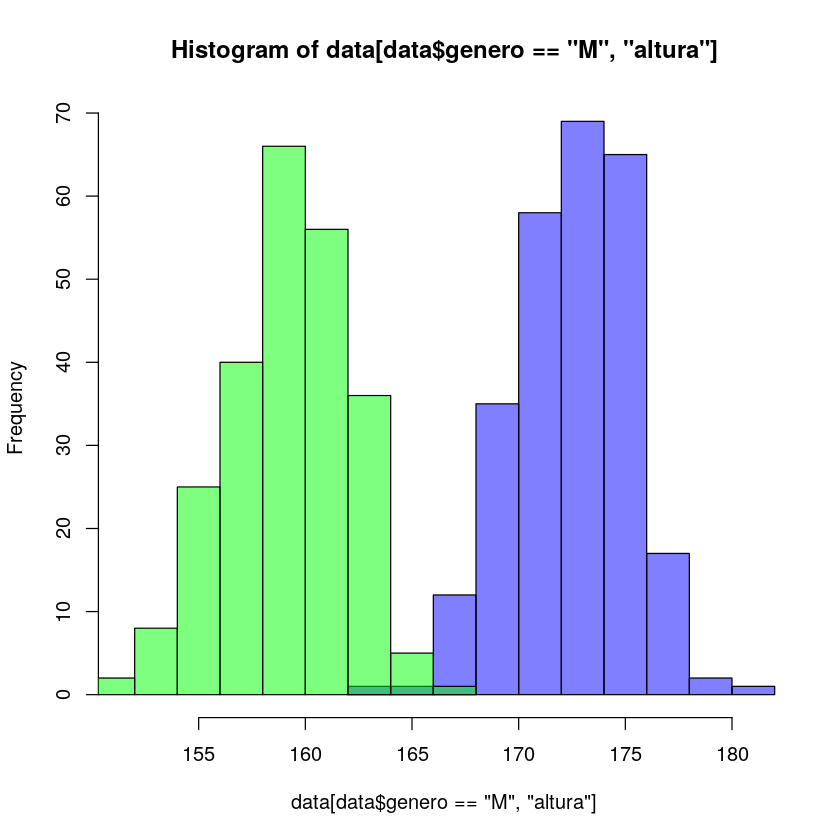

In [3]:
hist(data[data$genero=='M','altura'], xlim=c(min(data$altura),max(data$altura)), col=rgb(0,0,1,0.5))
hist(data[data$genero=='F','altura'], add=T, col=rgb(0,1,0,0.5))

In [8]:
boxplot(data[data$genero=='M','altura'])
boxplot(data[data$genero=='F','altura'])

ERROR: Error in data$genero: object of type 'closure' is not subsettable


## 2.

In [4]:
# Hecho en 4

## 3.

In [5]:
# Hecho en 5h

# 2. El cuerpo: Regla óptima de Bayes - Método Discriminativo

In [6]:
ClasificoVecinos <- function(X, Y, xNuevo, k=10){
    # Ordeno las etiquetas Y en función de 
    # la distancia de xNuevo a cada valor de X
    Y.ordenados <- Y[ order(abs(X - xNuevo)) ]
    k.cercanos  <- Y.ordenados[1:k]
    # Clasifica en favor de la clase 1 en empate con k par
    pred <- as.numeric(mean(k.cercanos)>=0.5)
    return(pred)
}

In [7]:
X <- data$altura
# Factor M:2, F:1 ==> M:0, F:1
Y <- as.numeric(data$genero)*(-1)+2
ClasificoVecinos(X, Y, xNuevo=150)

[1] 1

In [8]:
ClasificoMovil <- function(X, Y, xNuevo, h=1){
    # Devuelve NA si no hay datos dentro de la ventana
    # Filtro etiquetas de valores de X en ventana +/- h
    Y.en.ventana <- Y[ X > xNuevo-h & X < xNuevo+h ]
    # Clasifica en favor de la clase 1 en caso de empate
    pred <- as.numeric(mean(Y.en.ventana)>=0.5)
    return(pred)
}

In [9]:
ClasificoMovil(X, Y, xNuevo=155)

[1] 1

# 3. El aditivo aromático: Regla óptima de Bayes - Método Generativo

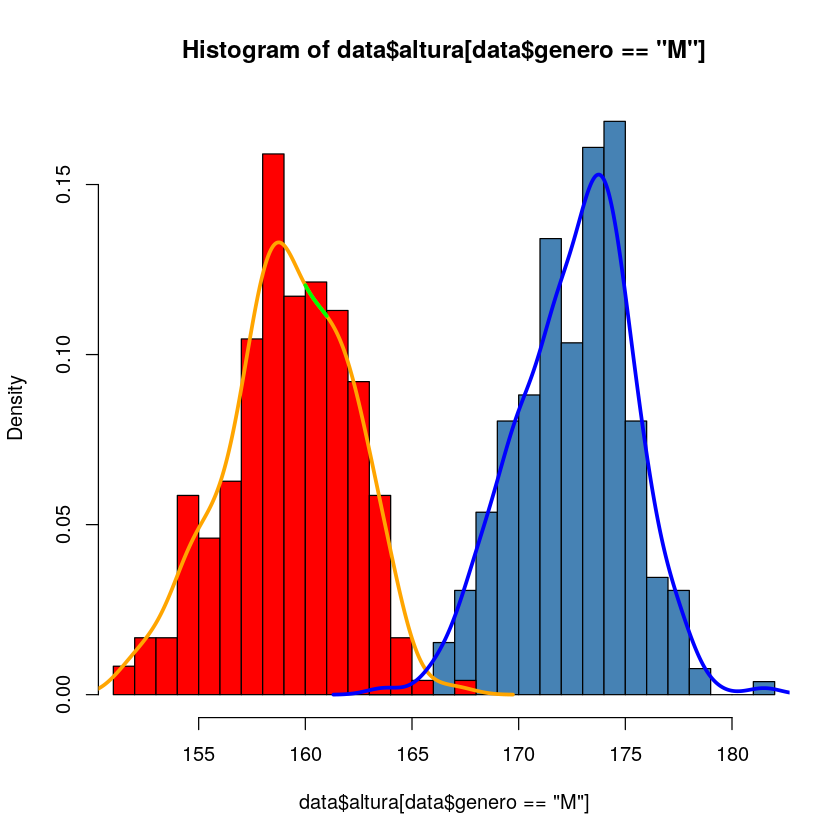

In [10]:
hist(data$altura[data$genero=='M'], prob=T, breaks=20, col="steelblue", xlim=c(min(data$altura),max(data$altura)))
hist(data$altura[data$genero=='F'], prob=T, breaks=20, col="red", add=T)
lines(density(data$altura[data$genero=='F'], k='gaussian'), lwd=3, col="orange")
lines(density(data$altura[data$genero=='M'], k='gaussian'), lwd=3, col="blue")
lines(density(data$altura[data$genero=='F'], k='gaussian', from=160, to=161), lwd=3, col="green")



## Clasificador Generativo

Estimo la función de densidad condicional $f_{X|Y=1}(x)$ y $f_{X|Y=0}(x)$ , llamadas $f_1(x)$ y $f_0(x)$, usando la función `density` de R como se pide en el punto 6.

Para evaluar estas funciones y obtener el *likelihood*, especifico un solo valor a estimar, desde y hasta un mismo valor `xNuevo`.

In [11]:
ClasificoGenerativo <- function(X, Y, xNuevo){
    # Estimo probabilidades condicionadas con kernel gaussiano
    f_1.x <- density(X[Y==1], k='gaussian', from=xNuevo, to=xNuevo, n=1)$y
    f_0.x <- density(X[Y==0], k='gaussian', from=xNuevo, to=xNuevo, n=1)$y
    # Estimo probilidades a priori de las clases
    P_1 <- mean(Y)
    P_0 <- 1 - P_1
    # Uso regla de Bayes óptima para clasificación
    pred <- as.numeric(f_1.x*P_1 >= f_0.x*P_0)
    return(pred)
}

# 4. A batir!

## 10.

In [12]:
data.test <- read.csv('./alturas.testeo.csv')
head(data.test)

altura,genero,contextura_madre,altura_madre
169.4,M,mediana,157.9
155.5,F,mediana,157.8
164.4,F,alta,168.1
155.5,F,bajita,155.5
162.3,F,alta,162.9
160.9,F,mediana,161.3


In [13]:
X <- data$altura
# Factor M:2, F:1 ==> M:0, F:1
Y <- as.numeric(data$genero)*(-1)+2


In [14]:
Y.test <- as.numeric(data.test$genero)*(-1)+2

In [15]:
# Vecinos
error <- 0
m <- length(data.test$altura)
predicciones <- rep(NA, m)
for(i in 1:m){
    x <- data.test[i, 'altura']
    predicciones[i] <- ClasificoVecinos(X, Y, xNuevo=x)
}
error <- mean(abs(predicciones-Y.test))

In [16]:
error

[1] 0.03225806

In [17]:
# Movil
error <- 0
m <- length(data.test$altura)
predicciones <- rep(NA, m)
for(i in 1:m){
    x <- data.test[i, 'altura']
    predicciones[i] <- ClasificoMovil(X, Y, xNuevo=x)
}
error <- mean(abs(predicciones-Y.test))

In [18]:
error

[1] 0.03225806

In [19]:
# Generativo
error <- 0
m <- length(data.test$altura)
predicciones <- rep(NA, m)
for(i in 1:m){
    x <- data.test[i, 'altura']
    predicciones[i] <- ClasificoGenerativo(X, Y, xNuevo=x)
}
error <- mean(abs(predicciones-Y.test))

In [20]:
error

[1] 0.03225806

# 5. Bonus Track

### Leyendo el fondo de la copa...

## 11.

11. Graficar `xNuevo` (en el eje de abscisas) tomando valores entre 160 y 170 con un paso de 0.01 y en el de ordenadas el valor con el que clasifica a cada valor la regla `ClasificoVecinos` que implementaste con tus datos (sugerimos representar con l ́ınea).

    Interpretar el criterio con el que clasifica esta regla.


## 12.

12. Repetir el  ́ıtem anterior con ClasificoMovil y ClasificoGenerativo y superponer
con otro color al gr ́afico anterior.

    Interpretar y comparar el criterio con el que clasifica
cada regla.

In [34]:
grillaX <- seq(160,170,0.01)
m <- length(grillaX)
preds.Vec <- rep(NA, m)
preds.Mov <- rep(NA, m)
preds.Gen <- rep(NA, m)

In [38]:
for(i in 1:m){
    x <- grillaX[i]
    preds.Vec[i] <- ClasificoVecinos(X, Y, xNuevo=x)
    preds.Mov[i] <- ClasificoMovil(X, Y, xNuevo=x)
    preds.Gen[i] <- ClasificoGenerativo(X, Y, xNuevo=x)
}

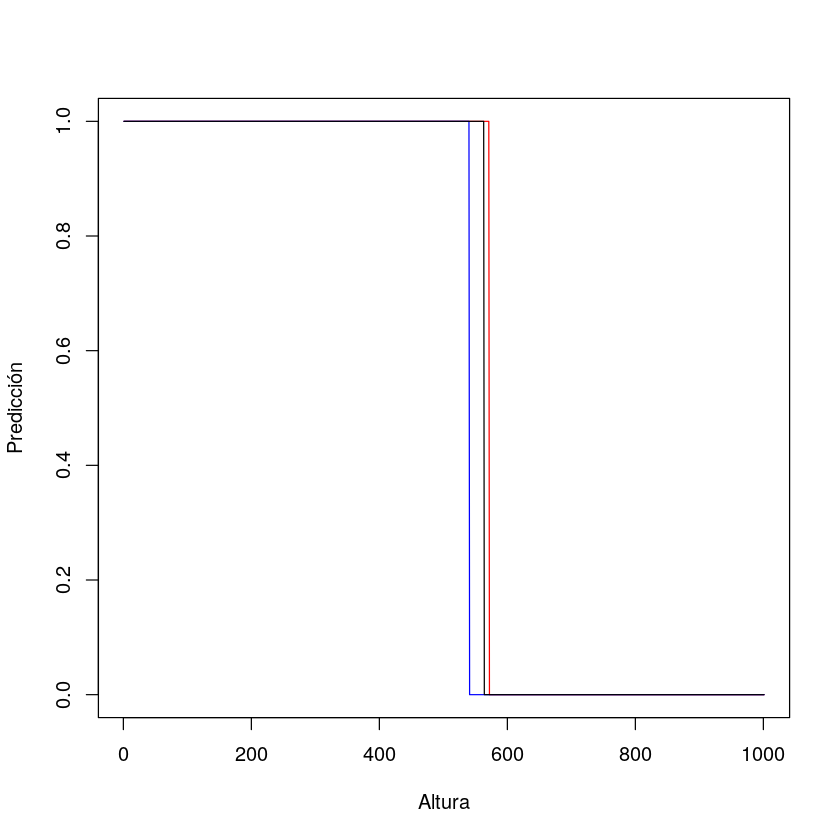

In [42]:
plot(preds.Vec, type='l', col='red', xlab='Altura', ylab="Predicción")
lines(preds.Mov, col='blue')
lines(preds.Gen)